In [88]:
#Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
# for plots to appear in the notebook
%matplotlib inline 

# Pipeline
from sklearn.pipeline import make_pipeline

# preprocessing
from sklearn.preprocessing import StandardScaler

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df = pd.read_csv("heart.csv") 
df.shape # (rows, columns)

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Lets nemame the columns to a more descriptive names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'Disease']

In [6]:
df.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  303.000000  303.000000       303.000000              303.000000   
mean    54.366337    0.683168         0.966997              131.623762   
std      9.082101    0.466011         1.032052               17.538143   
min     29.000000    0.000000         0.000000               94.000000   
25%     47.500000    0.000000         0.000000              120.000000   
50%     55.000000    1.000000         1.000000              130.000000   
75%     61.000000    1.000000         2.000000              140.000000   
max     77.000000    1.000000         3.000000              200.000000   

       cholesterol  fasting_blood_sugar  rest_ecg_type  \
count   303.000000           303.000000     303.000000   
mean    246.264026             0.148515       0.528053   
std      51.830751             0.356198       0.525860   
min     126.000000             0.000000       0.000000   
25%     211.000000             0.000000       0.000000   
50%     240.000000             0.000000       1.000000   
75%     274.500000             0.000000       1.000000   
max     564.000000             1.000000       2.000000   

       max_heart_rate_achieved  exercise_induced_angina  st_depression  \
count               303.000000               303.000000     303.000000   
mean                149.646865                 0.326733       1.039604   
std                  22.905161                 0.469794       1.161075   
min                  71.000000                 0.000000       0.000000   
25%                 133.500000                 0.000000       0.000000   
50%                 153.000000                 0.000000       0.800000   
75%                 166.000000                 1.000000       1.600000   
max                 202.000000                 1.000000       6.200000   

       st_slope_type  num_major_vessels  thalassemia_type     Disease  
count     303.000000         303.000000        303.000000  303.000000  
mean        1.399340           0.729373          2.313531    0.544554  
std         0.616226           1.022606          0.612277    0.498835  
min         0.000000           0.000000          0.000000    0.000000  
25%         1.000000           0.000000          2.000000    0.000000  
50%         1.000000           0.000000          2.000000    1.000000  
75%         2.000000           1.000000          3.000000    1.000000  
max         2.000000           4.000000          3.000000    1.000000

In [7]:
#using profilling to profile the data
import pandas_profiling as pp
pp.ProfileReport(df)

From the profile report, the data has no missing values. There are 9 catigorical variables and 5 numeric variables.
Lets confirm missing values with the isnull() method

In [8]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg_type              0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope_type              0
num_major_vessels          0
thalassemia_type           0
Disease                    0
dtype: int64

In [50]:
#Check for target counts
df.Disease.value_counts()

1    165
0    138
Name: Disease, dtype: int64

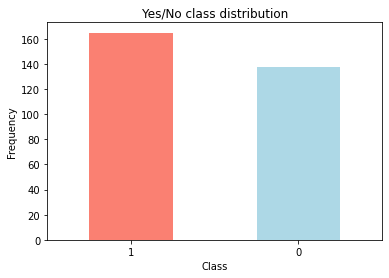

In [51]:
        #Let's plot the counts of 
        LABELS = ["1", "0"]
        count_classes = pd.value_counts(df['Disease'], sort = True)
        count_classes.plot(kind = 'bar',color=["salmon", "lightblue"], rot=0)
        plt.title("Yes/No class distribution")
        plt.xticks(range(2), LABELS)
        plt.xlabel("Class")
        plt.ylabel("Frequency");


In [52]:
#lets look at the target vrs female catigory
# Comparing target column with sex column
pd.crosstab(df.Disease, df.sex)

sex       0    1
Disease         
0        24  114
1        72   93

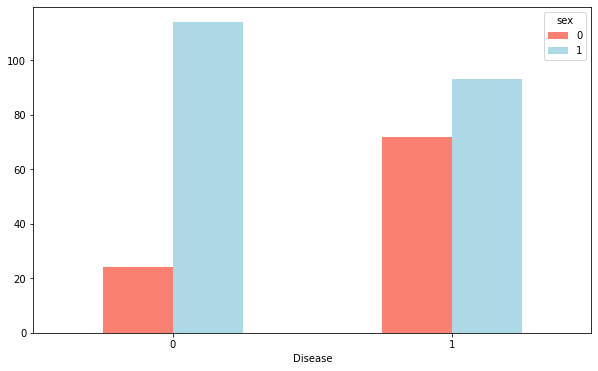

In [53]:
pd.crosstab(df.Disease, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"])
plt.xticks(rotation=0); # for keeping the labels on the x-axis vertical

<AxesSubplot:>

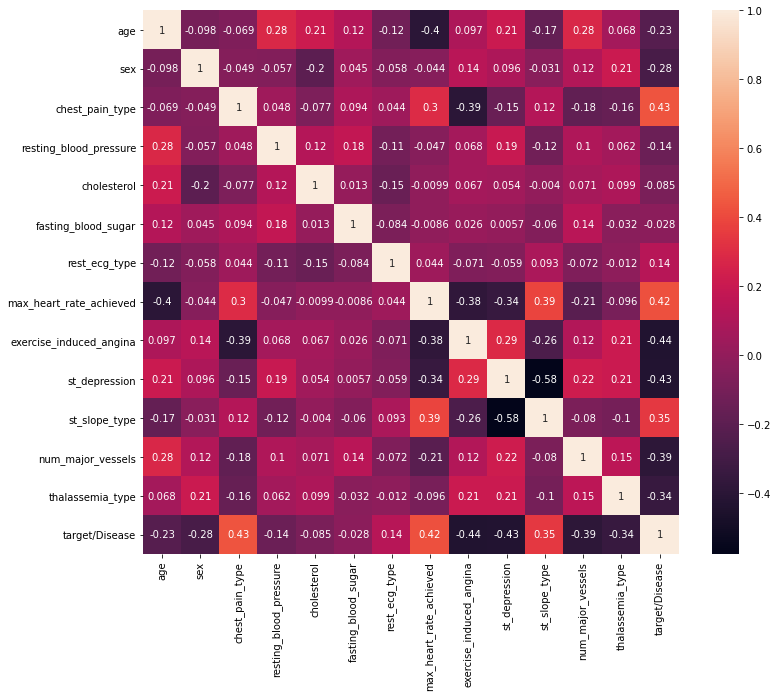

In [36]:
#Lets look at correlation among variables
#Lets generate a heatmap showing the relation among features
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

It is clear from the heatmap that there is weak correlation among variable and target's correlation with other variables is less than 50%.

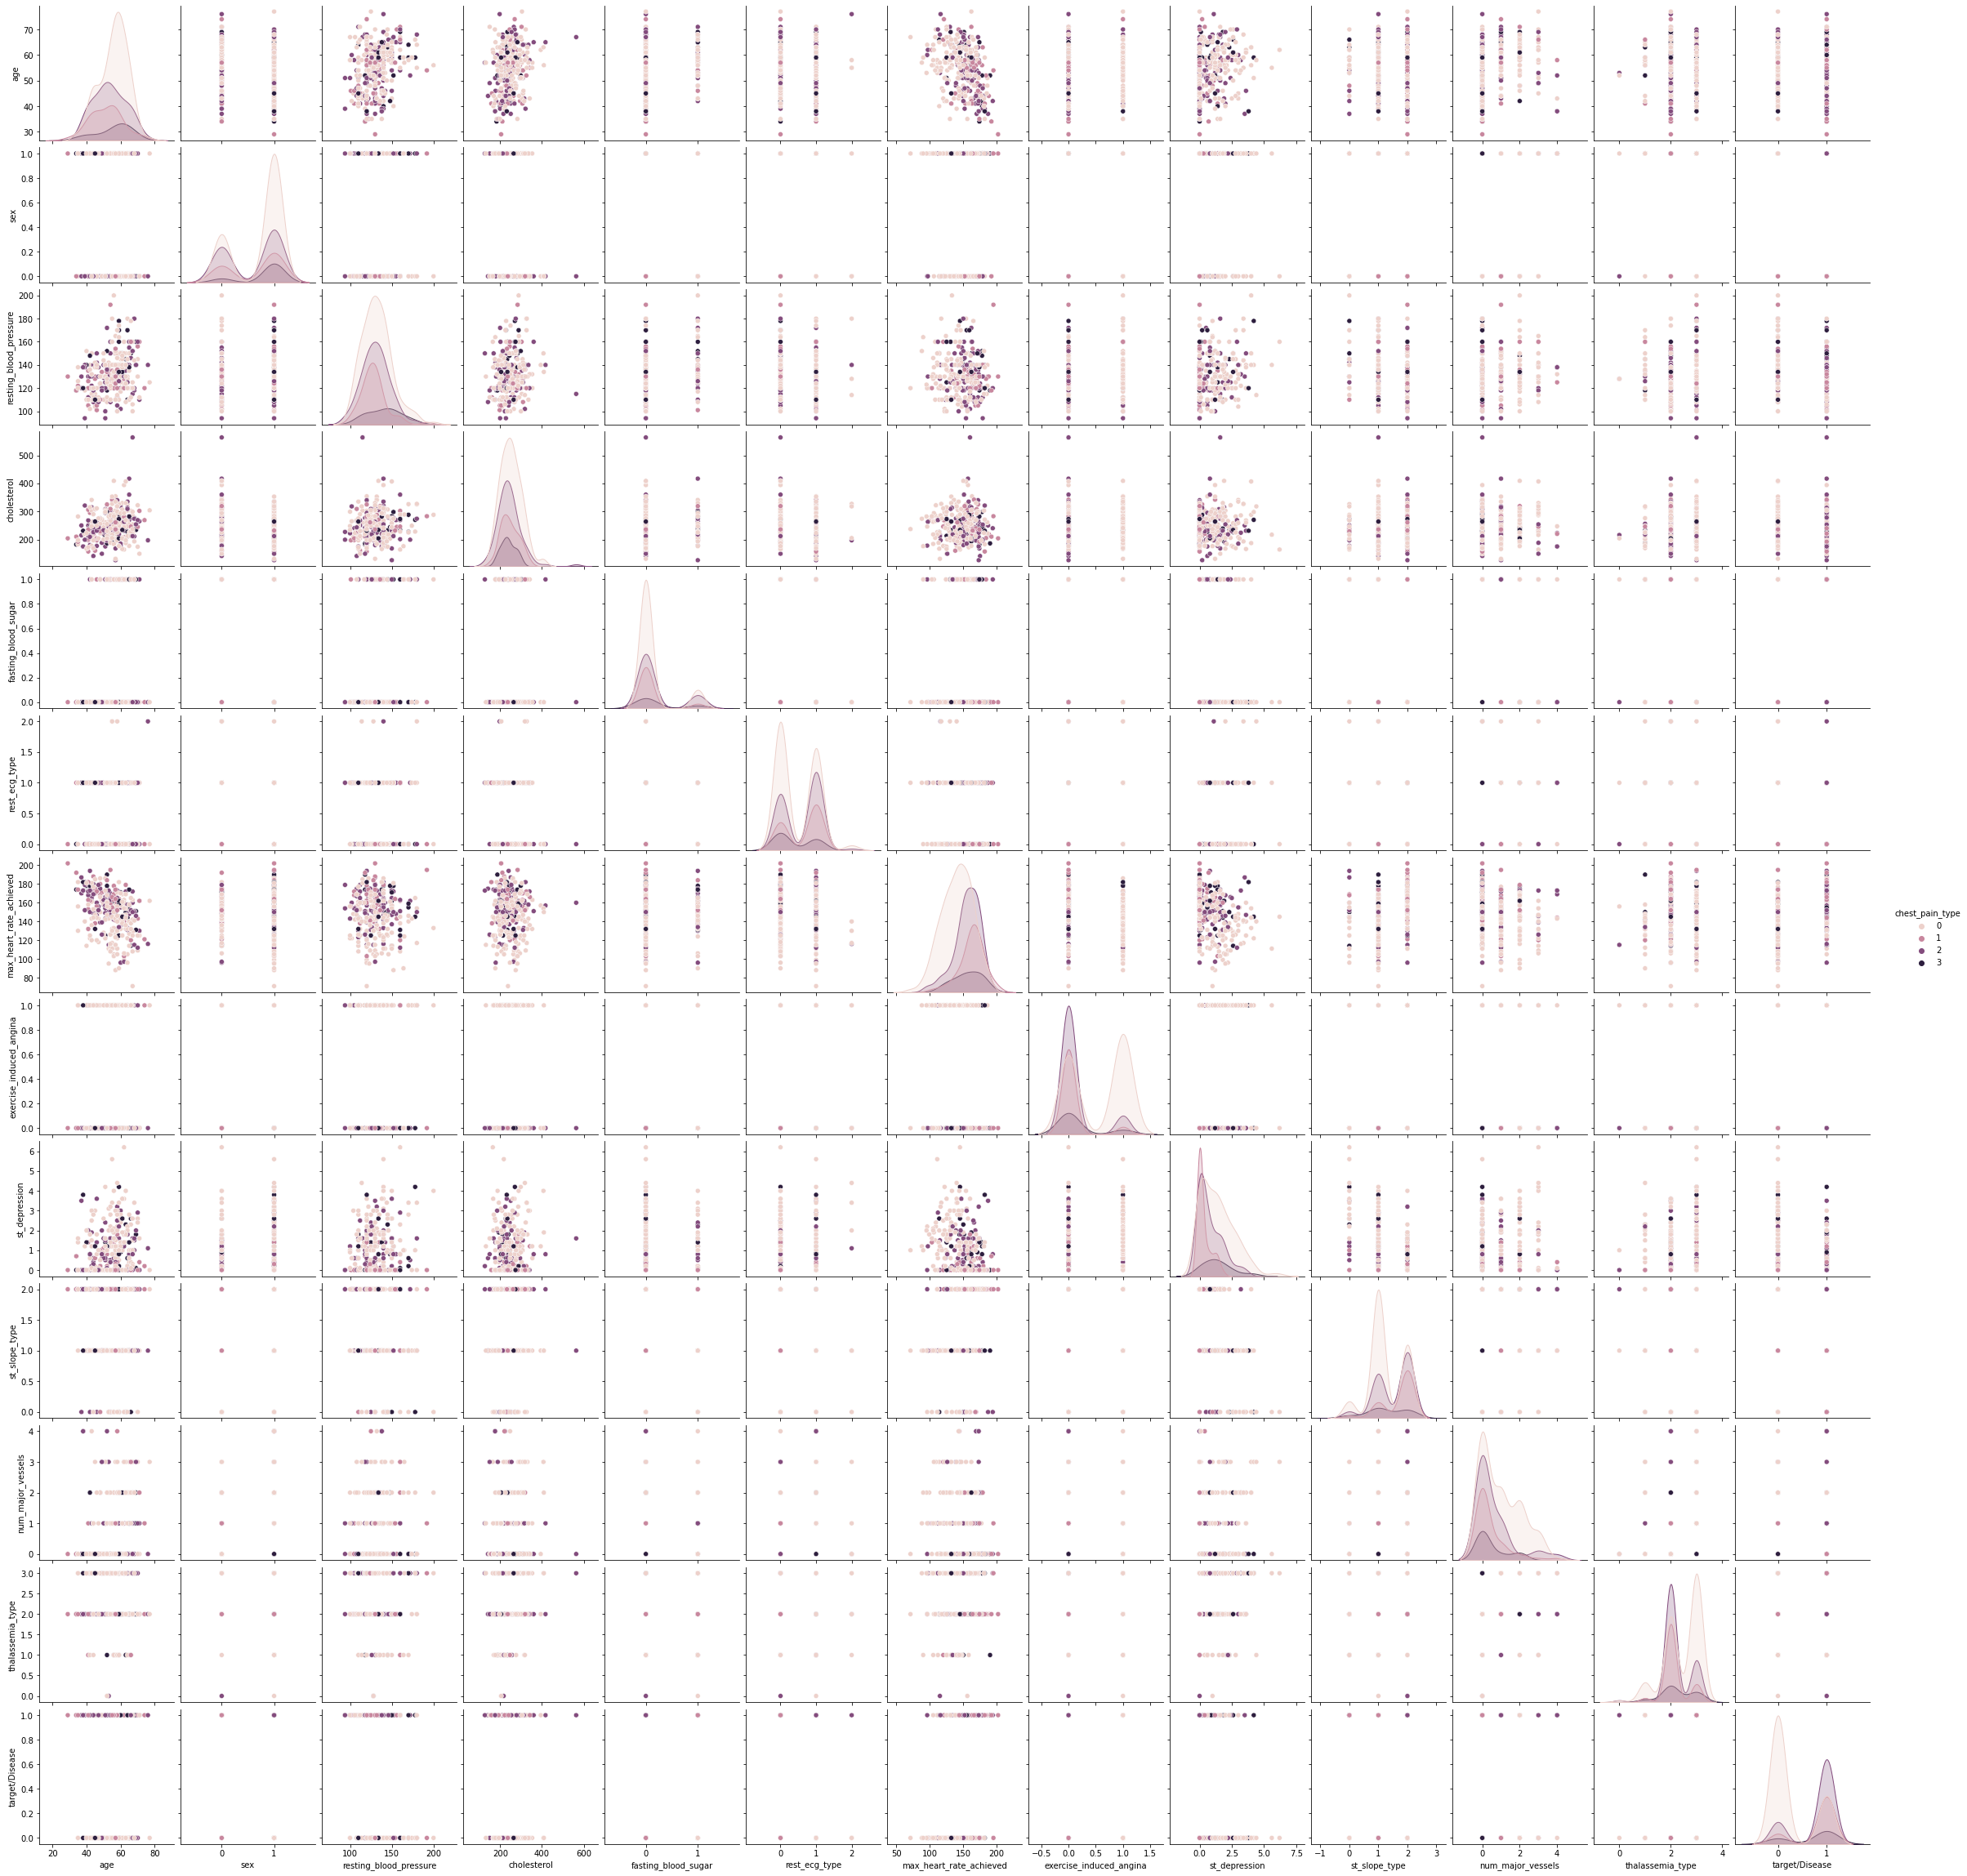

In [40]:
#Let's look at the pairwise correlations in a graphical format
sns.pairplot(df,hue='chest_pain_type')

# Processing data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg_type            303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope_type            303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia_type         303 non-null    int64  
 13  Disease                  303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [28]:
Lets chec
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg_type  max_heart_rate_achieved  \
0                    1              0                      150   
1                    0              1                      187   
2                    0              0                      172   
3                    0              1                      178   
4                    0              1                      163   

   exercise_induced_angina  st_depression  st_slope_type  num_major_vessels  \
0                        0            2.3              0                  0   
1                        0            3.5              0                  0   
2                        0            1.4              2                  0   
3                        0            0.8              2                  0   
4                        1            0.6              2                  0   

   thalassemia_type  Disease  
0                 1        1  
1                 2        1  
2                 2        1  
3                 2        1  
4                 2        1

In [50]:
#Lets get dummies for catigorical features
#dummies = pd.get_dummies(df['chest_pain_type'])
dmy=pd.get_dummies(df['chest_pain_type'], prefix='chest_pain_type', drop_first=True)
dmy1=pd.get_dummies(df['fasting_blood_sugar'], prefix='fasting_blood_sugar', drop_first=True)
dmy2=pd.get_dummies(df['rest_ecg_type'], prefix='rest_ecg_type', drop_first=True)
dmy3=pd.get_dummies(df['st_slope_type'], prefix='st_slope_type', drop_first=True)
dmy4=pd.get_dummies(df['thalassemia_type'], prefix='thalassemia_type', drop_first=True)
dmy5=pd.get_dummies(df['exercise_induced_angina'], prefix='thalassemia_type', drop_first=True)

# add dummy variables to df_ dataframe, 
dummies= pd.concat([dmy, dmy1, dmy2, dmy3, dmy4, dmy5], axis=1)

In [59]:
df_2= pd.concat([df, dummies], axis=1)

In [60]:
df_2.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg_type  max_heart_rate_achieved  \
0                    1              0                      150   
1                    0              1                      187   
2                    0              0                      172   
3                    0              1                      178   
4                    0              1                      163   

   exercise_induced_angina  st_depression  ...  chest_pain_type_3  \
0                        0            2.3  ...                  1   
1                        0            3.5  ...                  0   
2                        0            1.4  ...                  0   
3                        0            0.8  ...                  0   
4                        1            0.6  ...                  0   

   fasting_blood_sugar_1  rest_ecg_type_1  rest_ecg_type_2  st_slope_type_1  \
0                      1                0                0                0   
1                      0                1                0                0   
2                      0                0                0                0   
3                      0                1                0                0   
4                      0                1                0                0   

   st_slope_type_2  thalassemia_type_1  thalassemia_type_2  \
0                0                   1                   0   
1                0                   0                   1   
2                1                   0                   1   
3                1                   0                   1   
4                1                   0                   1   

   thalassemia_type_3  thalassemia_type_1  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   1  

[5 rows x 26 columns]

In [61]:
df_2.shape

(303, 26)

Lets drop the catigorical variables with dummie

In [62]:
df_2.drop(columns=['chest_pain_type','fasting_blood_sugar','rest_ecg_type','st_slope_type', 'exercise_induced_angina','thalassemia_type'],axis=1,inplace=True)
df_2.shape

(303, 20)

In [63]:
df_2.head()

age  sex  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63    1                     145          233                      150   
1   37    1                     130          250                      187   
2   41    0                     130          204                      172   
3   56    1                     120          236                      178   
4   57    0                     120          354                      163   

   st_depression  num_major_vessels  Disease  chest_pain_type_1  \
0            2.3                  0        1                  0   
1            3.5                  0        1                  0   
2            1.4                  0        1                  1   
3            0.8                  0        1                  1   
4            0.6                  0        1                  0   

   chest_pain_type_2  chest_pain_type_3  fasting_blood_sugar_1  \
0                  0                  1                      1   
1                  1                  0                      0   
2                  0                  0                      0   
3                  0                  0                      0   
4                  0                  0                      0   

   rest_ecg_type_1  rest_ecg_type_2  st_slope_type_1  st_slope_type_2  \
0                0                0                0                0   
1                1                0                0                0   
2                0                0                0                1   
3                1                0                0                1   
4                1                0                0                1   

   thalassemia_type_1  thalassemia_type_2  thalassemia_type_3  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   thalassemia_type_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1

#Data looks clean and will be ready for model training. 

In [ ]:
f

In [82]:
dtm = sklearn.tree.DecisionTreeClassifier(criterion="entropy")
X = df_2.drop("Disease", axis=1)
y = df_2["Disease"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

In [83]:
dtm.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [93]:
y_predict = dtm.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.875

# Test multiple splits to avoid overfitting

In [86]:
for size in [.80, 0.60,0.50, 0.4, 0.3,0.25,0.2,0.15,0.1,0.05]:
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=size)
    dtm.fit(X_train, y_train)
    y_predict = dtm.predict(X_test)
    print(size, accuracy_score(y_test,y_predict))

0.8 0.6995884773662552
0.6 0.7087912087912088
0.5 0.6644736842105263
0.4 0.6639344262295082
0.3 0.6923076923076923
0.25 0.7763157894736842
0.2 0.7868852459016393
0.15 0.8260869565217391
0.1 0.8064516129032258
0.05 0.875


# Models

In [114]:
lm = LogisticRegression(solver='liblinear')
svm = SVC()
tree= DecisionTreeClassifier()
knn= KNeighborsClassifier(n_neighbors=5)
rf1 = RandomForestClassifier(n_estimators=100)

# Logistic model

In [115]:
lm.fit(X_train,y_train)
accuracy_train = lm.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = lm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 87.11 Percentage
Accuracy for Testing : 87.5 Percentage


# Support Vector Classifier

In [111]:
svm.fit(X_train,y_train)
accuracy_train = svm.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 66.9 Percentage
Accuracy for Testing : 81.25 Percentage


# Random forest classifier

In [116]:
rf1.fit(X_train,y_train)
accuracy_train = rf1.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')
y_pred = rf1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 100.0 Percentage
Accuracy for Testing : 87.5 Percentage


# K-Neighbors Classifier¶

In [117]:
knn.fit(X_train,y_train)
accuracy_train = knn.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 75.96 Percentage
Accuracy for Testing : 68.75 Percentage


In [118]:
model = ['LogisticRegression','SVC','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier']
accuracy = [87.5,81.25,87.5,68.75,87.5]

In [119]:
pd.DataFrame({'Name':model,'Accuracy':accuracy})

Name  Accuracy
0      LogisticRegression     87.50
1                     SVC     81.25
2  DecisionTreeClassifier     87.50
3    KNeighborsClassifier     68.75
4  RandomForestClassifier     87.50

We have 3 models with same accuracy: LR, RF, and DT. I will perform parameter tuning of RF.

In [120]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf1 = RandomForestClassifier(random_state=6)
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [5, 15, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5]}
grid = GridSearchCV(rf1, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rf1 = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.875


In [122]:
grid.best_score_

0.8326388888888889

In [123]:
grid.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=6)

In [129]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.75      0.82      0.78        11

    accuracy                           0.69        16
   macro avg       0.62      0.61      0.61        16
weighted avg       0.67      0.69      0.68        16

